In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import keras
from keras.layers import Dense, Activation, Input
from keras.models import Model

Using TensorFlow backend.


In [2]:
ds = pd.read_csv('/home/kabir/data/mnist/mnist_train.csv')

In [3]:
data = ds.values

In [4]:
X_data = data[:, 1:]

In [5]:
X_std = X_data/255.0
n_train = int(0.75*X_std.shape[0])
n_val = int(0.25*X_std.shape[0])

X_train = X_std[:n_train]
X_val = X_std[n_train:n_train+n_val]

print(X_train.shape, X_val.shape)

(44999, 784) (14999, 784)


In [6]:
########## Preparing the Auto Encoder ##########

In [7]:
inp = Input(shape = (784, ))                  # Using Keras Functional API
embedding_dim = 64                            # Dimensions of hidden vector representation

fc1 = Dense(embedding_dim)(inp)
ac1 = Activation('tanh')(fc1)

fc2 = Dense(784)(ac1)
ac2 = Activation('sigmoid')(fc2)

autoencoder = Model(inputs = inp, outputs = ac2)

In [8]:
########## Listing the layers used in Auto Encoder to form Encoder/Decoder ##########

print('\n')
for layer in autoencoder.layers:
    print(layer)
print('\n')

In [9]:

########## Preparing the Encoder and Decoder from Auto-Encoder's layers ##########

encoder = Model(inputs = inp, outputs = ac1)

dec_inp = Input(shape=(embedding_dim,))
x = autoencoder.layers[3](dec_inp)
x = autoencoder.layers[4](x)

decoder = Model(inputs = dec_inp, outputs = x)


In [10]:
########## Compiling and fiting the Auto Encoder ##########

autoencoder.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])
hist = autoencoder.fit(X_train, X_train, epochs=25, batch_size=100, shuffle=True, validation_data=(X_val, X_val))

auto_encoder_encodes = encoder.predict(X_train)                  # Encoder generates a hidden-dimension (64 dim) representation of original data (784 dim)
auto_encoder_decodes = decoder.predict(auto_encoder_encodes)     # Decoder decodes hidden-representation (64 dim) given by encoder to dimensions of input data (784 dim)



Train on 44999 samples, validate on 14999 samples
Epoch 1/25
44999/44999 [==============================] - 4s 100us/step - loss: 0.0661 - acc: 0.0129 - val_loss: 0.0504 - val_acc: 0.0105
Epoch 2/25
44999/44999 [==============================] - 4s 83us/step - loss: 0.0447 - acc: 0.0126 - val_loss: 0.0399 - val_acc: 0.0142
Epoch 3/25
44999/44999 [==============================] - 4s 83us/step - loss: 0.0367 - acc: 0.0143 - val_loss: 0.0339 - val_acc: 0.0147
Epoch 4/25
44999/44999 [==============================] - 4s 85us/step - loss: 0.0320 - acc: 0.0127 - val_loss: 0.0303 - val_acc: 0.0105
Epoch 5/25
44999/44999 [==============================] - 4s 92us/step - loss: 0.0286 - acc: 0.0109 - val_loss: 0.0272 - val_acc: 0.0109
Epoch 6/25
44999/44999 [==============================] - 4s 92us/step - loss: 0.0261 - acc: 0.0105 - val_loss: 0.0255 - val_acc: 0.0108
Epoch 7/25
44999/44999 [==============================] - 4s 83us/step - loss: 0.0240 - acc: 0.0104 - val_loss: 0.0228 - val_ac

In [11]:
########## Applying PCA from sklearn on the same data ##########

from sklearn.decomposition import PCA

pca = PCA(n_components=embedding_dim)
pca_dim_reducts = pca.fit_transform(X_std[:(n_train + n_val)])
pca_regenerations = pca.inverse_transform(pca_dim_reducts)





In [12]:
########## Comparing 5 regerations from PCA & Auto Encoders ##########
plt.figure(0)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

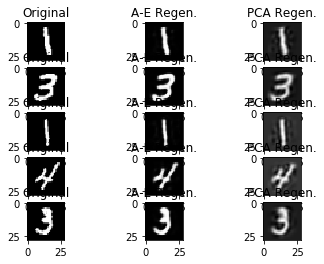

In [13]:
 for ix in range(5, 10):
    plt.subplot(5, 3, ((ix-5) * 3) + 1)
    plt.title('Original')
    plt.imshow(X_train[ix].reshape((28, 28)), cmap='gray')
    plt.subplot(5, 3, ((ix-5) * 3) + 2)
    plt.title('A-E Regen.')
    plt.imshow(auto_encoder_decodes[ix].reshape((28, 28)), cmap='gray')
    plt.subplot(5, 3, ((ix-5) * 3) + 3)
    plt.title('PCA Regen.')
    plt.imshow(pca_regenerations[ix].reshape((28, 28)), cmap='gray')
plt.show()